# Quiz 1 Review

In [1]:
# This is a setup cell so that Python and R can run in the same Jupyter notebook
# and so that the text of plots is bigger by default.
import altair as alt
import pandas as pd
# Set a bigger default font size for plots
def bigger_font():
    return {
        'config': {
            'view': {'continuousWidth': 400, 'continuousHeight': 300},
            'legend': {'symbolSize': 14, 'titleFontSize': 14, 'labelFontSize': 14}, 
            'axis': {'titleFontSize': 15, 'labelFontSize': 12},
            'encoding': {'x': {'scale': {'zero': False}}}}}
alt.themes.register('bigger_font', bigger_font)
alt.themes.enable('bigger_font')

# Ensure that altair plots show up in the exported HTML
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

# Load the extension so that we can use the %%R cell magic
%load_ext rpy2.ipython

In [2]:
%%R
# The line above is the "R" cell magic, which mean we can write R code in this cell
library(tidyverse)
library(cowplot)
library(infer)
library(taxyvr)
options(repr.matrix.max.rows = 10)
# Set a bigger default font size for plots
theme_set(theme_gray(base_size = 18))

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
from vega_datasets import data

cars = data.cars()
iris = data.iris()
source = data.cars()

## Lecture 1: Intro

### 1. Summary

- **What is data visualization?**   
data visualization is about representing numbers with graphical components. These include many components, such as position, area, color, etc, Picking the most appropriate component for you data can be tricky, but fortunately there is research on which are the most appropriate for different situations as we will see later.

- **Why bother visualizing data instead of showing raw numbers?**   
    - Human beings can spot patterns and arrive at conclusion much faster by glancing at visual representations of data rather than numerical representations 
    - While we need to train ourselves to recognize structure in numerical data, we have evolved to instinctively recognize visual patterns and to accurately judge properties such as colors and distances between objects.
    - humans are not good at detecting patterns in raw numbers, and we don't have good intuition about which combination of numbers can contribute to the same statistical summaries
    

- **The R and Python visualization landscapes**


<img src="img/r-py-plotting-landscapes.jpeg" alt="drawing" width="300" align="center"/>

<!-- <p align="center">
  <img width="600" height="200" src="https://www.python.org/static/img/python-logo@2x.png">
</p> -->

- **concise visualization grammar for [Altair](https://altair-viz.github.io/) and [ggplot](https://ggplot2.tidyverse.org/)**
    - 1. first create a canvas/chart
    - 2. encode your data variables as different dimensions in this chart (x, y, color, etc)
    - 3. add geometric marks to represent the data (points, lines, etc).
    - <img src="img/grammar-of-graphics.jpeg" alt="drawing" width="200" align="center"/> 
    

> **data**

### 2. dot plot

#### **python**

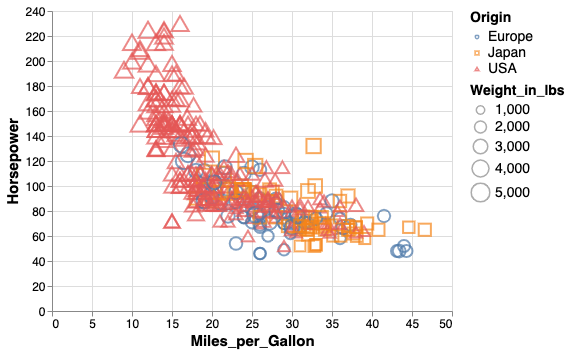

In [4]:
alt_point = (
    alt.Chart(cars)
    .mark_point()
    .encode(
        x="Miles_per_Gallon",
        y="Horsepower",
        color="Origin",
        shape="Origin",
        size="Weight_in_lbs",
    )
)

alt_point

#### **R**


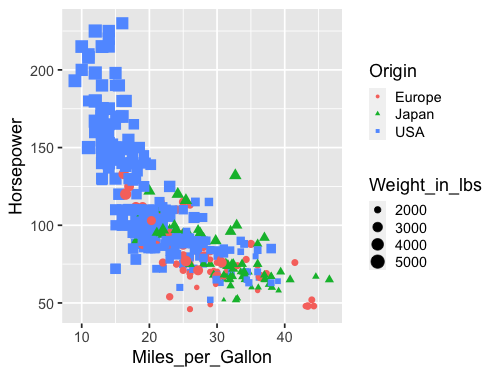

In [5]:
%%R -i cars -w 500 -h 375
# -i "imports" an object from Python to use in R, here the `cars` df
# The other options set the plot size,
# you can do this for the same effect in an R kernel:
# options(repr.plot.width=7, repr.plot.height=5)

gg_point <- ggplot(cars) +
  aes(
    x = Miles_per_Gallon,
    y = Horsepower,
    color = Origin,
    shape = Origin,
    size = Weight_in_lbs
  ) +
    geom_point()

gg_point

### 3. Line chart, data aggregation, combine point chart

Three types of Compound Charts:

1. Layered charts     
allow you to overlay two different charts on the same set of axes. They can be useful, for example, when you wish to draw multiple marks for the same data; for example:

2. Facets    
Like repeated charts, Faceted charts provide a more convenient API for creating multiple views of a dataset for a specific type of chart: one where each panel contains a different subset of data.

3. Repeat    
The RepeatChart object provides a convenient interface for a particular type of horizontal or vertical concatenation, in which the only difference between the concatenated panels is modification of one or more encodings.

#### **python**

- [more encoding](https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation)
- [Encoding Data Types](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types)

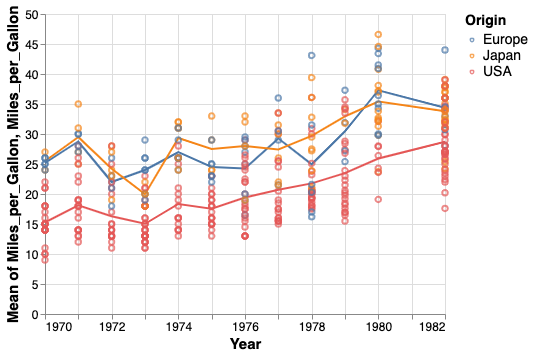

In [6]:
# in python
# ---------

alt_line_point = (
    alt.Chart(cars)
    .mark_line()
    .encode(
        alt.X("Year"),
        alt.Y('Miles_per_Gallon', aggregate='mean'),   # aggregate
#         y="mean(Miles_per_Gallon)",         # aggregate
        color="Origin")                     # group
)


alt_line_point + alt_line_point.mark_point().encode(y="Miles_per_Gallon")

#### **R**



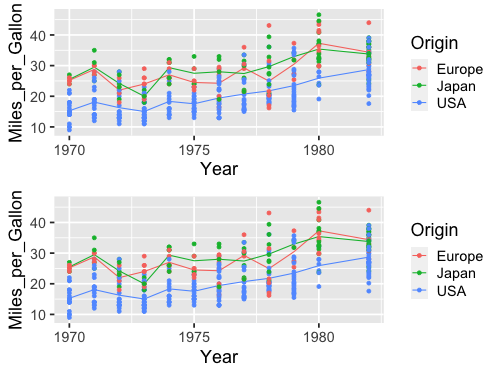

In [7]:
%%R -w 500 -h 375

# `geom_line` way
gg_line_geom <- ggplot(cars) +
    aes(
        x = Year,
        y = Miles_per_Gallon,
        # color - ggplot can group lines according to unique values in a column in the dataframe and summarize them
        color = Origin                         
    ) +
    # geom_line - aggregate (When we don't specify any explicit value to stat for each data point, the default is 'identity'
    # which you can think of as "show the exact identity/value don't summarize them".)
    geom_line(stat = "summary", fun = mean) +    
    geom_point()                                 # add point chart



# `stat_summary` way
gg_line_stat <- ggplot(cars) + 
    aes(
      x = Year,
      y = Miles_per_Gallon,
      color = Origin
    ) +
    stat_summary(geom = "line", fun = mean) +
    geom_point()


# combine together
plot_grid(gg_line_geom,
          gg_line_stat,
          ncol = 1
         )

**`geom_` approach VS `stat_summary` approach**

These two approaches are identical in terms of functionality, but you will see both when you search for help online, so it is good to be aware of both. Personally, I like the geom_ approach since that means we are always using the same function for plotting data, regardless of whether we are plotting the raw identity value, or summaries. This makes the visual appearance of the code cleaner and easier to read, but you are free to use either. This is a nice SO answer if you want to know more [link](https://stackoverflow.com/questions/38775661/what-is-the-difference-between-geoms-and-stats-in-ggplot2/44226841#44226841).

## Lecture 2: Visual encodings and plot configuration

- [Readings: section 1.4 - 1.8](https://socviz.co/lookatdata.html#visual-tasks-and-decoding-graphs)
- [Jeffrey Heer's PyData talk](https://www.youtube.com/watch?v=hsfWtPH2kDg)

### 1. Summary

- **Issues with 3D plotting**   
The biggest issues with using 3D is when it is usd unnecessarily (like a 3D bar or pie chart), as the only way to compare position (like a 3D scatter plot), and when they are represented on a 2D medium like a paper where they can't be rotated. Sometimes 3D can be useful, like a topographical map or a protein folding visualization. But be cautious, we saw above that even in naturally 3D systems like blood vessels it is still mentally more complex when they are 3D. [Claus Wilke's has a good chapter](https://clauswilke.com/dataviz/no-3d.html) on this if you are interested to read more. There is also [some interesting work done with the Rayshader library](https://www.tylermw.com/3d-ggplots-with-rayshader/) that maps 3D in an intuitive way and incorporates reasonable camera rotation around the objects. Below is an example of visualizing the bend in space time without the need for an additional 2D plot.

    

In [8]:
url = "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gm = pd.read_csv(url)

In [9]:
%%R
url = 'https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv'
gm = read_csv(url)


── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  year = col_double(),
  population = col_double(),
  region = col_character(),
  sub_region = col_character(),
  income_group = col_character(),
  life_expectancy = col_double(),
  income = col_double(),
  children_per_woman = col_double(),
  child_mortality = col_double(),
  pop_density = col_double(),
  co2_per_capita = col_double(),
  years_in_school_men = col_double(),
  years_in_school_women = col_double()
)



### 2. Area Plot

#### **python**

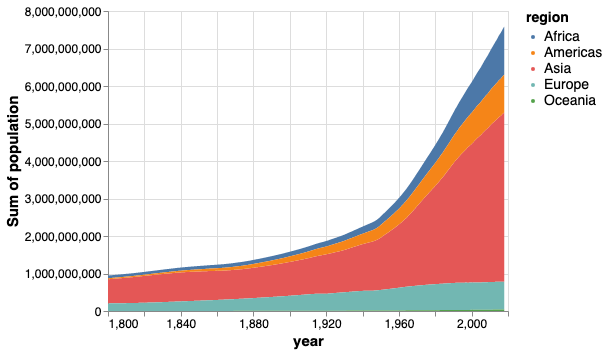

In [10]:
alt_area = (
    alt.Chart(gm)
    .mark_area()
    .encode(x="year", 
            y="sum(population)", 
            color="region")
)


alt_area

#### **R**

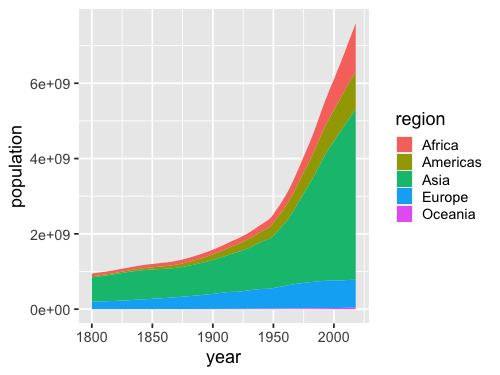

In [11]:
%%R -w 500 -h 375


gg_area <- ggplot(gm) + 
    aes(x = year, 
        y = population, 
        fill = region) +                      # When coloring bars and areas in ggplot, we need to use fill instead of color.
    geom_area(stat = "summary", fun = sum)

# If you want to use `stat_summary` instead,
# you need to set `position = 'stack'` as I mentiond in the lab.
# I think using the geom-approach above is cleaner though.
# stat_summary(fun=sum, geom='area', position='stack')

gg_area

### 3. Bar Chart

Difference between bar chart and histogram

- Bar chart: discrete/categorical variables
- histogram: Count continuous/numerical variables



#### **python**

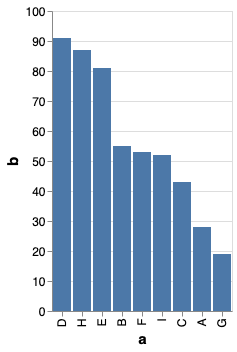

In [45]:
source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

alt.Chart(source).mark_bar().encode(
    x=alt.X("a", sort="-y"),
    y='b'
)

In [12]:
# Subset the data that we will use
# Note that you can type just the year part 
# of a date as a string instead of typing out 
# the entire line 2018-01-01
gm2018 = gm[gm['year'] == 2018]

In [49]:
cars

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


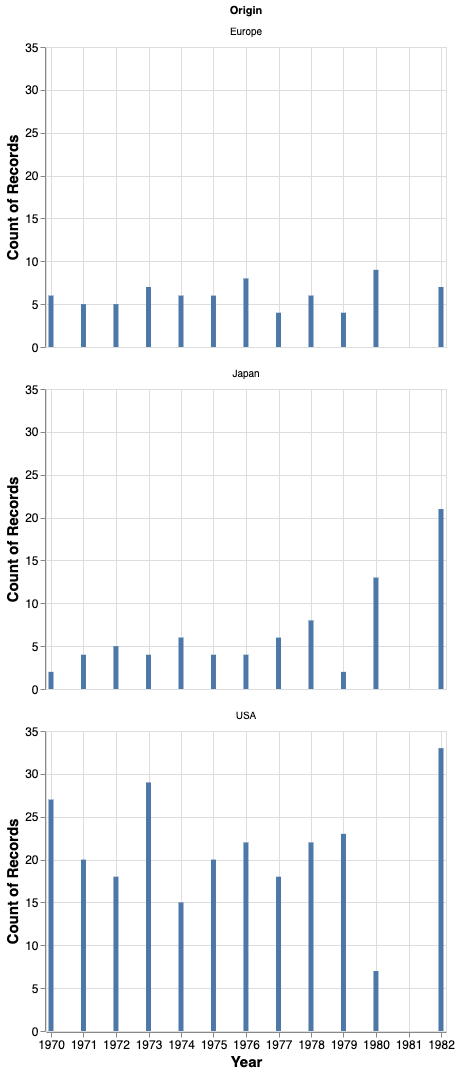

In [54]:
import altair as alt
from vega_datasets import data

cars = data.cars()

cars

(
    alt.Chart(cars)
    .mark_bar()
    .encode(
        x=alt.X("Year"),  
        y="count()"
    )
    .facet('Origin', columns=1) 
)




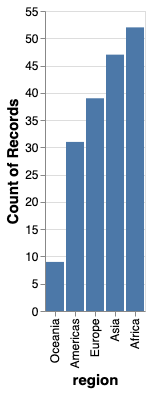

In [41]:
alt_bar_1 = (alt.Chart(gm2018)
             .mark_bar()
             .encode(x=alt.X("region", sort="y"),  # sort by y in acsending order, -y for descening order
                     y="count()")
            )



alt_bar_2 = (alt.Chart(gm2018)
             .mark_bar()
             .encode(y=alt.Y("region", sort="x"), 
                     x=alt.X("population", aggregate="sum"))
            )

alt_bar_1
# alt_bar_2

#### **R**

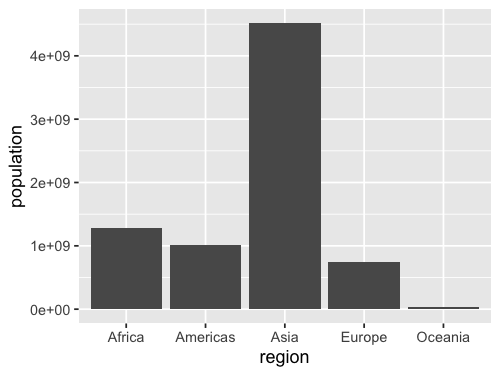

In [14]:
%%R -w 500 -h 375
gm2018 <- gm %>% filter(year == 2018)

ggplot(gm2018) +
    aes(x = region, 
        y = population) +
    geom_bar(stat = 'summary', fun = sum)
    


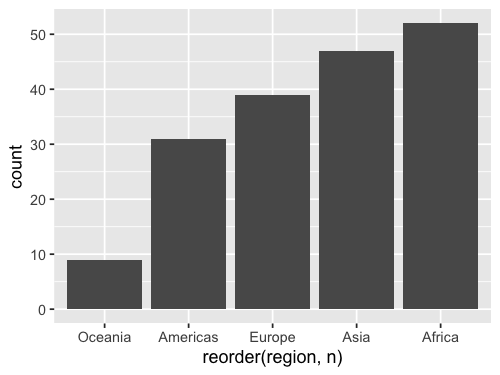

In [37]:
%%R -w 500 -h 375
gm2018 %>%
    add_count(region) %>%
    ggplot() + 
        aes(x = reorder(region, n)) +          # -n for reverse order (n is a column)
        geom_bar(stat = 'count')               # the default stat is actually 'count'
        

# Remove y when counting and use the 'count' stat instead of 'summary' . 
# Since there is only one way of counting we don't need to specify a function (there are many ways of summarizing: mean, median, sum, sd, etc).
# ggplot(gm2018) + 
#     aes(x = region) +
#     geom_bar(stat = 'count') # default stat is 'count'

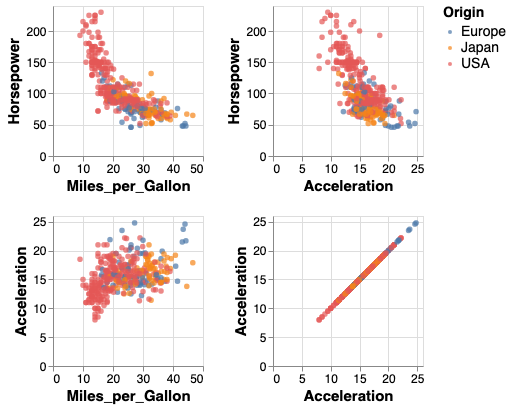

In [16]:
(
    alt.Chart(source)
    .mark_circle()
    .encode(
        alt.X(alt.repeat("column"), type="quantitative"),
        alt.Y(alt.repeat("row"), type="quantitative"),
        color="Origin:N",
    )
    .properties(width=150, height=150)
    .repeat(
        row=["Horsepower", "Acceleration"], column=["Miles_per_Gallon", "Acceleration"]
    )
)

### 3.Histograms

- Most visualization programs that generate histograms will choose a bin width by default, but chances are that bin width is not the most appropriate one for any histogram you may want to make. It is therefore critical to always try different bin widths to verify that the resulting histogram reflects the underlying data accurately. 
- In general, if the bin width is too small, then the histogram becomes overly peaky and visually busy and the main trends in the data may be obscured. 
- On the other hand, if the bin width is too large, then smaller features in the distribution of the data, such as the dip around age 10, may disappear.
- <img src="img/bin_width.png" alt="drawing" width="600" align="center"/>  

**density plot**
- **Def:**  
In a density plot, we attempt to visualize the underlying probability distribution of the data by drawing an appropriate continuous curve (Figure 7.3). This curve needs to be estimated from the data, and the most commonly used method for this estimation procedure is called kernel density estimation.

- **the exact visual appearance of a density plot depends on:**   
The kernel and bandwidth choices
    - If the bandwidth is too small, then the density estimate can become overly peaky and visually busy and the main trends in the data may be obscured. On the other hand, if the bandwidth is too large, then smaller features in the distribution of the data may disappear.
    - In addition, the choice of the kernel affects the shape of the density curve. For example, a Gaussian kernel will have a tendency to produce density estimates that look Gaussian-like, with smooth features and tails. By contrast, a rectangular kernel can generate the appearance of steps in the density curve.
    - In general, the more data points there are in the data set, the less the choice of the kernel matters. Therefore, density plots tend to be quite reliable and informative for large data sets but can be misleading for data sets of only a few points.
    - <img src="img/band_width.png" alt="drawing" width="600" align="center"/>  
    
    
- **Pitfall**  
Kernel density estimates have one pitfall that we need to be aware of: They have a tendency to produce the appearance of data where none exists, in particular in the tails. As a consequence, careless use of density estimates can easily lead to figures that make nonsensical statements. For example, if we don’t pay attention, we might generate a visualization of an age distribution that includes negative ages

#### **python**

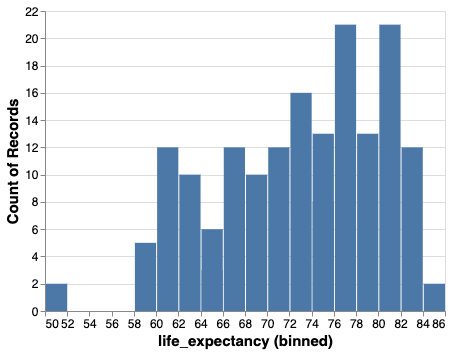

In [17]:
alt_hist = (alt.Chart(gm2018)
            .mark_bar()
            .encode(x=alt.X('life_expectancy', 
                            bin = alt.Bin(maxbins=30)),
                    y='count()',
                    tooltip=alt.Tooltip('life_expectancy', bin=True))   # more interactive
           )

alt_hist

#### **R**

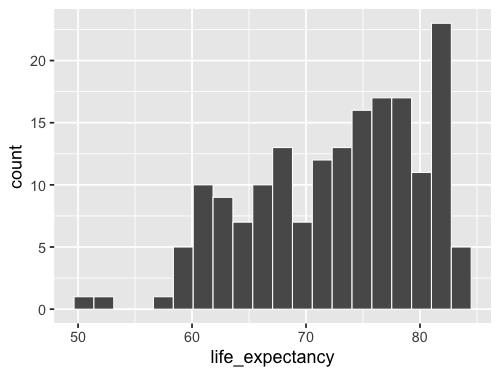

In [18]:
%%R -w 500 -h 375
gg_gist <- ggplot(gm2018) +
    aes(x = life_expectancy) +
    geom_histogram(
        bins = 20,        # similar to maxbins in Altair.
        color = "white"   # add some gap between bars
    )        

gg_gist

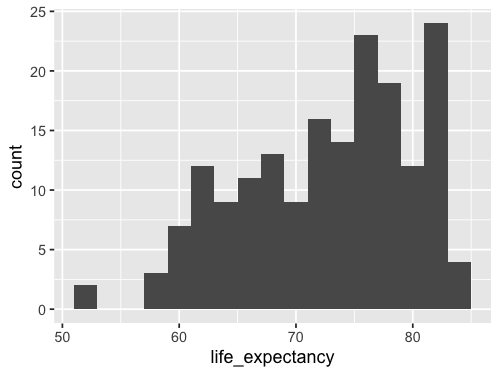

In [19]:
%%R -w 500 -h 375

# geom_histogram is a shortcut for geom_bar(stat = 'bin')
# geom_bar - same as geom_histogram but a more verbose way
ggplot(gm2018) +
    aes(x = life_expectancy) +
    geom_bar(stat = 'bin', binwidth = 2)

### 4.Facets

- Visualizing multiple distributions at the same time

**Facets and Repeat**

- The RepeatChart object: create subplots that each display all the data points, but is repeated for different columns in the data.

provides a convenient interface for a particular type of horizontal or vertical concatenation, in which the only difference between the concatenated panels is modification of one or more encodings.

- Faceted charts: creates one subplot per unique value in a categorical column and displays the same numerical columns in all the subplots/facets.    
provide a more convenient API for creating multiple views of a dataset for a specific type of chart: one where each panel contains a different subset of data.

#### **python**

**stacked histogram** 

- **Goal**   
To condition the distributions on another variable we could use color. However this becomes messy and it is hard to compare bars that are on different baselines.

- **Issues**
    - First, from just looking at the figure, it is never entirely clear where exactly the bars begin. Do they start where the color changes or are they meant to start at zero? In other words, are there about 25 females of age 18–20 or are there almost 80? (The former is the case.) 
    - Second, the bar heights for the female counts cannot be directly compared to each other, because the bars all start at a different height. For example, the men were on average older than the women, and this fact is not at all visible in Figure

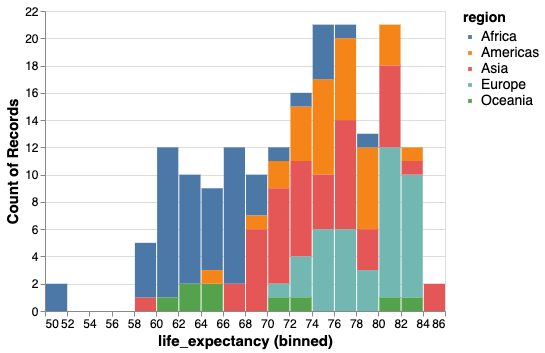

In [20]:
alt_facet_1 = (alt.Chart(gm2018)
               .mark_bar()
               .encode(x=alt.X('life_expectancy', 
                               bin=alt.Bin(maxbins=30)),
                       y='count()',
                       color='region')
              )

alt_facet_1

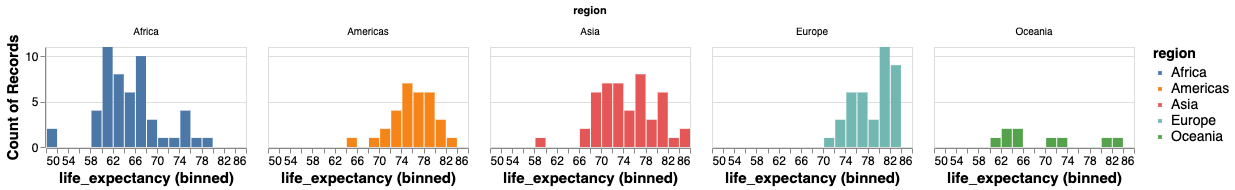

In [21]:
# It is better to use the position visual encoding to separate bars into subplots, or facets.
# this multiple subplotting is called
# -----------------------------------
# Facet plotting | multiple views
# -----------------------------------

alt_facet_2 = (alt.Chart(gm2018)
               .mark_bar()
               .encode(x=alt.X('life_expectancy', 
                               bin=alt.Bin(maxbins=30)),
                       y='count()',
                       color='region')
               .properties(width=200, height=100)            # figure size
               .facet('region', columns=5)                   # separate bars into subplots, or facets.
              )

alt_facet_2

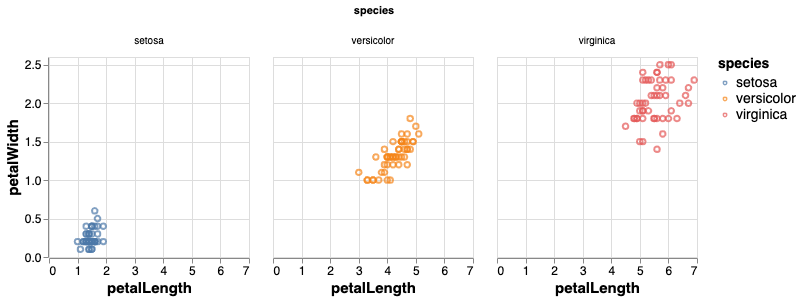

In [22]:
alt_facet_3 = (alt.Chart(iris)
               .mark_point()
               .encode(
                   x = "petalLength",
                   y = "petalWidth",
                   color = "species")
               .properties(width=200, height=200)
               .facet(column = "species")
              )

alt_facet_3

##### **"Repeat"**   
not multiple views on different subset of data, but rather to create subplots that each display all the data points, but is repeated for different columns in the data.

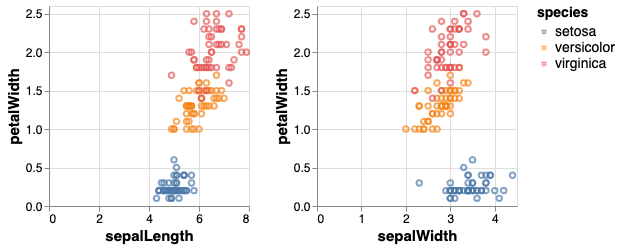

In [23]:
alt_repeat_1 = (alt.Chart(iris)
               .mark_point()
               .encode(
                   alt.X(alt.repeat("column"), type = "quantitative"),
                   alt.Y("petalWidth"),
                   color = "species")
               .properties(width=200, height=200)
               .repeat(column = ["sepalLength", "sepalWidth"])
              )

alt_repeat_1

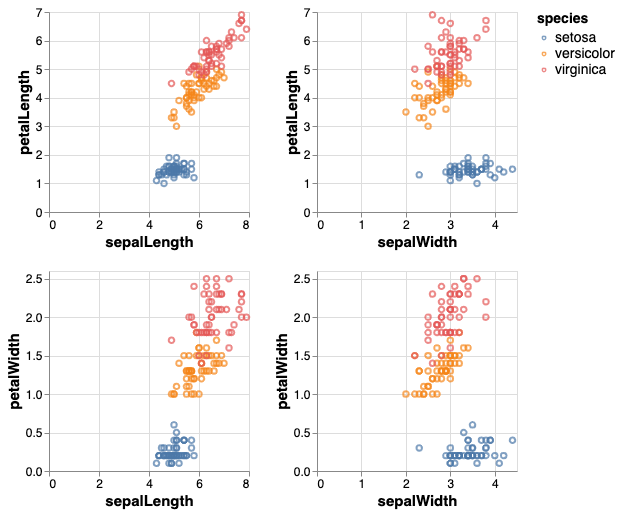

In [24]:
# scatter plot

alt_repeat_2 = (alt.Chart(iris)
               .mark_point()
               .encode(
                   alt.X(alt.repeat("column"), type = "quantitative"),
                   alt.Y(alt.repeat("row"), type = "quantitative"),
                   color = "species")
               .properties(width=200, height=200)
               .repeat(column = ["sepalLength", "sepalWidth"],
                      row = ["petalLength", "petalWidth"])
              )

alt_repeat_2

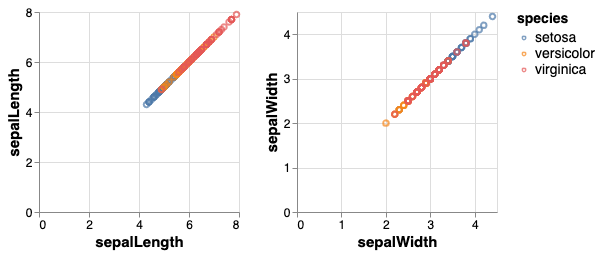

In [25]:
# histogram
# repeat(repeat = [columns to histogram over]
alt_repeat_3 = (alt.Chart(iris)
               .mark_point()
               .encode(
                   alt.X(alt.repeat("repeat"), type = "quantitative"),
                   alt.Y(alt.repeat("repeat"), type = "quantitative"),
                   color = "species")
               .properties(width=200, height=200)
               .repeat(repeat = ["sepalLength", "sepalWidth"],
                      columns = 3)
              )

alt_repeat_3

##### **"facet + Repeat"**   

#### **R**

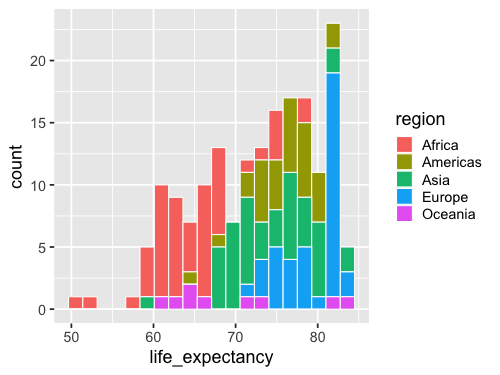

In [26]:
%%R -w 500 -h 375
# To condition the distributions on another variable we could use color.
# However this becomes messy and it is hard to compare bars that are on different baselines.

gg_facet_1 <- ggplot(gm2018) +
    aes(x = life_expectancy, 
        fill = region) +
    geom_histogram(bins = 20, 
                   color = "white")
    
gg_facet_1

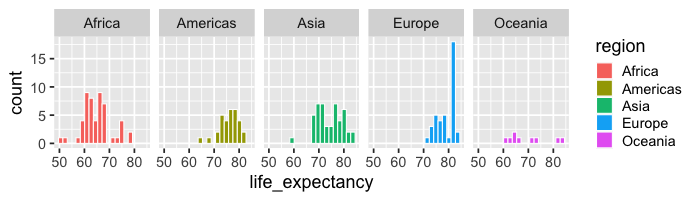

In [27]:
%%R -w 700 -h 200

gg_facet_2 <- ggplot(gm2018) +
    aes(x = life_expectancy, 
        fill = region) +
    geom_histogram(bins = 20, 
                   color = 'white') +
    facet_wrap(~region, ncol = 5)
    
gg_facet_2

##### **"Repeat"**   
not multiple views on the same data, but rather to the different views on different columns

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



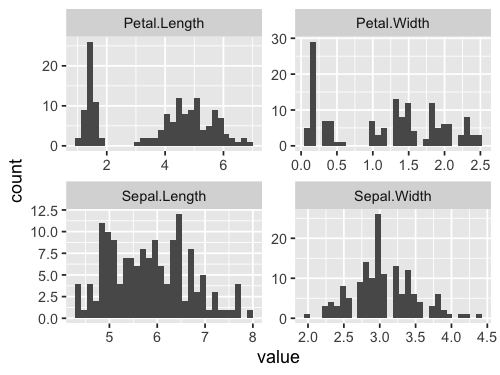

In [28]:
%%R -w 500 -h 375
gg_gist_multi_views <- iris %>% 
    select(-Species) %>% 
    pivot_longer(everything()) %>% 
    ggplot() + 
        aes(x = value) +
        geom_histogram() +
        facet_wrap(~name, scales = "free")

gg_gist_multi_views

### 5.Plot conﬁguration

#### **python**

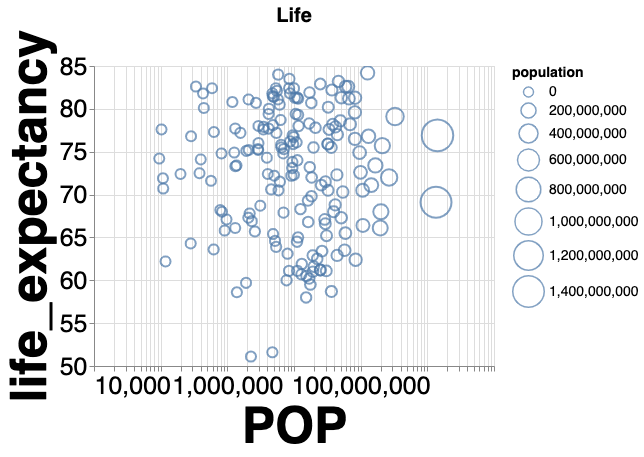

In [29]:
(
    alt.Chart(gm2018, title="Life")                                   # Change the title of the plot
    .mark_point()
    .encode(  
        alt.X(
            "population", scale=alt.Scale(type="log"), title="POP"    # Change the x-axis scale to log and the title to 'POP'
        ),  
        alt.Y(
            "life_expectancy", scale=alt.Scale(zero=False)            # Change the y-axis scale to not include zero
        ),  
        alt.Size(
            "population", scale=alt.Scale(range=(100, 1000))          # Change the range of the size scale to enlarge points
        ),  
        alt.Tooltip("country"),                                       # Att country on hover
    )  
    .configure_axis(
        labelFontSize=25, titleFontSize=50                            # Change axes title and label font sizes
    )  
    .configure_title(fontSize=20)                                     # Change plot title font size
    .configure_legend(titleFontSize=14)                               # Change legend font size
    .interactive()
)

#### **R**

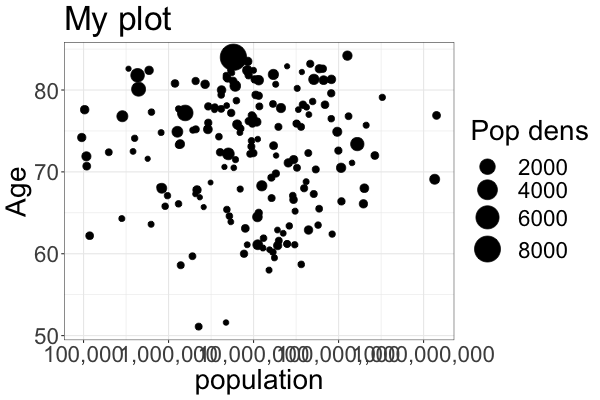

In [30]:
%%R -w 600 -h 400

ggplot(gm2018) +
    aes(x = population, 
        y = life_expectancy, 
        size = pop_density) +
    geom_point() +
    scale_x_log10(labels = scales::comma) +           # Change the x-axis scale to log and supress scientific notation
    scale_size(range = c(2, 12)) +                    # Change the range of the size scale to enlarge points
    ylab('Age') +                                     # Change the x-axis scale to log and the title to 'POP'
    ggtitle('My plot') +                              # Change the title of the plot
    labs(size = 'Pop dens') +                         # Change legend title
    theme_bw() +                                      # Change the theme to black and white
    theme(text =  element_text(size = 28))            # Change the text size of all labels

## Lecture 3 & 4: Density Plot and Repeats
